![image](https://www.ewatercycle.org/assets/logo.png)

# Running MARRMoT M01 model using eWaterCycle package

This notebooks shows how to run [MARRMoT](https://github.com/wknoben/MARRMoT) M01 model using an example use-case. More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import pandas as pd

import ewatercycle.forcing
import ewatercycle.models

## Load forcing data

In [2]:
forcing = ewatercycle.forcing.load_foreign('marrmot',
                        directory='.',
                        start_time='1989-01-01T00:00:00Z',
                        end_time='1992-12-31T00:00:00Z',
                        forcing_info={
                            'forcing_file': 'BMI_testcase_m01_BuffaloRiver_TN_USA.mat'
                        })
print(forcing)

eWaterCycle forcing
-------------------
start_time=1989-01-01T00:00:00Z
end_time=1992-12-31T00:00:00Z
directory=/home/sarah/GitHub/ewatercycle/docs/examples
shape=None
forcing_file=BMI_testcase_m01_BuffaloRiver_TN_USA.mat


## Setting up the model

In [3]:
# Get available versions
ewatercycle.models.MarrmotM01.available_versions

('2020.11',)

In [4]:
# Make the model object 
model = ewatercycle.models.MarrmotM01(version='2020.11', forcing=forcing)
print(model)

eWaterCycle MarrmotM01
-------------------
Version = 2020.11
Parameter set = 
  None
Forcing = 
  eWaterCycle forcing
  -------------------
  start_time=1989-01-01T00:00:00Z
  end_time=1992-12-31T00:00:00Z
  directory=/home/sarah/GitHub/ewatercycle/docs/examples
  shape=None
  forcing_file=BMI_testcase_m01_BuffaloRiver_TN_USA.mat


In [5]:
# Show model parameters
model.parameters

[('maximum_soil_moisture_storage', 10.0),
 ('initial_soil_moisture_storage', 5.0),
 ('solver',
  Solver(name='createOdeApprox_IE', resnorm_tolerance=array([0.1]), resnorm_maxiter=array([6.]))),
 ('start time', '1989-01-01T00:00:00Z'),
 ('end time', '1992-12-31T00:00:00Z')]

In [6]:
# Change one of the model parameters and end time using setup() function
cfg_file, cfg_dir = model.setup(
    maximum_soil_moisture_storage=12.0,
    end_time = "1989-02-01T00:00:00Z",
)
print(cfg_dir)

/home/sarah/GitHub/ewatercycle/docs/examples/marrmot_20210712_092627


In [7]:
# Show model parameters that are changed in the previous cell 
model.parameters

[('maximum_soil_moisture_storage', 12.0),
 ('initial_soil_moisture_storage', 5.0),
 ('solver',
  Solver(name='createOdeApprox_IE', resnorm_tolerance=array([0.1]), resnorm_maxiter=array([6.]))),
 ('start time', '1989-01-01T00:00:00Z'),
 ('end time', '1989-02-01T00:00:00Z')]

In [8]:
# Initialize the model with config file
model.initialize(cfg_file)

In [9]:
# Show model variable names, only 'flux_out_Q' is supported for now.
model.output_var_names

('P',
 'T',
 'Ep',
 'S(t)',
 'par',
 'sol_resnorm_tolerance',
 'sol_resnorm_maxiter',
 'flux_out_Q',
 'flux_out_Ea',
 'wb')

In [9]:
# Get model output
discharge = []
time_range = []
end_time = model.end_time

# Perform all timesteps of the model, update output fields
while (model.time < end_time):
    model.update()
    # Store model time and variable output
    discharge.append(model.get_value('flux_out_Q')[0])
    time_range.append(model.time_as_datetime.date())
    print(model.time_as_isostr)
    

1989-01-02T00:00:00Z
1989-01-03T00:00:00Z
1989-01-04T00:00:00Z
1989-01-05T00:00:00Z
1989-01-06T00:00:00Z
1989-01-07T00:00:00Z
1989-01-08T00:00:00Z
1989-01-09T00:00:00Z
1989-01-10T00:00:00Z
1989-01-11T00:00:00Z
1989-01-12T00:00:00Z
1989-01-13T00:00:00Z
1989-01-14T00:00:00Z
1989-01-15T00:00:00Z
1989-01-16T00:00:00Z
1989-01-17T00:00:00Z
1989-01-18T00:00:00Z
1989-01-19T00:00:00Z
1989-01-20T00:00:00Z
1989-01-21T00:00:00Z
1989-01-22T00:00:00Z
1989-01-23T00:00:00Z
1989-01-24T00:00:00Z
1989-01-25T00:00:00Z
1989-01-26T00:00:00Z
1989-01-27T00:00:00Z
1989-01-28T00:00:00Z
1989-01-29T00:00:00Z
1989-01-30T00:00:00Z
1989-01-31T00:00:00Z
1989-02-01T00:00:00Z


In [12]:
# Store the output in a dataframe
simulated_discharge = pd.DataFrame(
    {'simulation': discharge}, index=pd.to_datetime(time_range)
)

<AxesSubplot:>

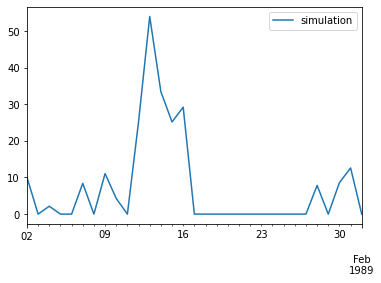

In [13]:
# Plot discharge time series
simulated_discharge.plot()

In [11]:
# Finalize the model
model.finalize()